# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on our Boston Housing Data set!

## Objectives
You will be able to:
* Run linear regression on Boston Housing dataset with all the predictors
* Interpret the parameters of the multiple linear regression model

## The Boston Housing Data

We pre-processed the Boston Housing Data again. This time, however, we did things slightly different:
- We dropped "ZN" and "NOX" completely
- We categorized "RAD" in 3 bins and "TAX" in 4 bins
- We used min-max-scaling on "B", "CRIM" and "DIS" (and logtransformed all of them first, except "B")
- We used standardization on "AGE", "INDUS", "LSTAT" and "PTRATIO" (and logtransformed all of them first, except for "AGE") 

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(["NOX","ZN"],axis=1)

# first, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0,6,  24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)



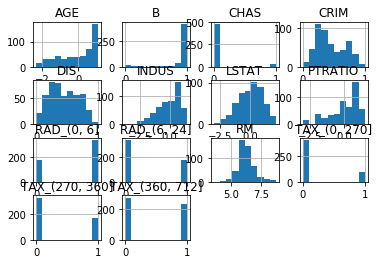

In [15]:
age = boston_features["AGE"]
b = boston_features["B"]
logcrim = np.log(boston_features["CRIM"])
logdis = np.log(boston_features["DIS"])
logindus = np.log(boston_features["INDUS"])
loglstat = np.log(boston_features["LSTAT"])
logptratio = np.log(boston_features["PTRATIO"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features["PTRATIO"] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

boston_features.hist();

In [41]:
np_medv = boston.target
boston_features['MEDV'] = np_medv
boston_features['TAX3'] = boston_features['TAX_(360, 712]']

In [46]:
boston_features = boston_features.drop(["TAX_(360, 712]"],axis=1)
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RAD1,RAD2,TAX1,TAX2,TAX3
0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,24.0,1,0,0,1,0
1,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,21.6,1,0,1,0,0
2,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,34.7,1,0,1,0,0
3,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,33.4,1,0,1,0,0
4,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,36.2,1,0,1,0,0


## Run an linear model in Statsmodels

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#formula="MEDV~CRIM+INDUS+CHAS+RM+AGE+DIS+PTRATIO+B+LSTAT"
#model =ols(formula=formula,data=boston_features).fit()

outcome = 'MEDV'
predictors = boston_features.drop('MEDV',axis=1)
pred_sum = "+".join(predictors.columns)

formula = outcome + "~" + pred_sum

In [49]:
model = ols(formula=formula,data=boston_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sat, 01 Jun 2019   Prob (F-statistic):          5.08e-153
Time:                        21:44:59   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4607      1.789      2.493      0.013       0.946       7.976
CRIM          -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS         -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS           2.5959      0.796      3.260      0.001       1.032       4.160
RM             2.6466      0.408      6.488      0.000       1.845       3.448
AGE            0.0794      0.352      0.226      0.821      -0.612       0.770
DIS          -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO       -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B              3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT         -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD1           1.5613      0.821      1.901      0.058      -0.052       3.175
RAD2           2.8993      1.073      2.701      0.007       0.791       5.008
TAX1           2.6222      0.716      3.665      0.000       1.216       4.028
TAX2           1.3624      0.704      1.936      0.053      -0.020       2.745
TAX3           0.4761      0.684      0.696      0.487      -0.868       1.820
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                     5.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Run the same model in Scikit-learn

## Remove the necessary variables to make sure the coefficients are the same for Scikit-learn vs Statsmodels

### Statsmodels

### Scikit-learn

## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

In [50]:
#PTRATIO -1.4867

#LSTAT -5.6288

boston_features.describe()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RAD1,RAD2,TAX1,TAX2,TAX3
count,506.000000,5.060000e+02,506.000000,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.448432,7.684674e-15,0.069170,6.284634,-1.407855e-15,0.449191,-3.139956e-14,0.898568,-3.419531e-15,22.532806,0.658103,0.341897,0.195652,0.343874,0.460474
std,0.226336,1.000990e+00,0.253994,0.702617,1.000990e+00,0.227318,1.000990e+00,0.230205,1.000990e+00,9.197104,0.474815,0.474815,0.397094,0.475470,0.498929
min,0.000000,-3.783365e+00,0.000000,3.561000,-2.335437e+00,0.000000,-3.000989e+00,0.000000,-3.036568e+00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268367,-6.614858e-01,0.000000,5.885500,-8.374480e-01,0.261281,-4.125447e-01,0.945730,-7.200364e-01,17.025000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387692,1.428756e-01,0.000000,6.208500,3.173816e-01,0.439687,3.139590e-01,0.986232,9.850402e-02,21.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666445,9.478254e-01,0.000000,6.623500,9.067981e-01,0.642307,7.840469e-01,0.998298,7.656165e-01,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.497881e+00,1.000000,8.780000,1.117494e+00,1.000000,1.468580e+00,1.000000,2.108674e+00,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You've fitted your first multiple linear regression model on the Boston Housing Data.